# Schelling model

In [1]:
import io
import imageio

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from scipy import signal

In [2]:
class Board:
    def __init__(self, size, t):
        super(Board, self).__init__()
        
        self.board = self.__gen_random_board(size)
        self.t = t
        
        self.kernel = np.array([1, 1, 1, 1, 0, 1, 1, 1, 1]).reshape((3,3))
        self.divisor = self.__gen_divisor(size)

    def __gen_random_board(self, size):
        board = np.concatenate((np.zeros((size**2)//2), np.ones((size**2)//2)))
        np.random.shuffle(board)
        board.resize((size, size))
        return board.astype(bool)
    
    def __gen_divisor(self, size):
        divisor = np.full((size, size), 8)
        divisor[0] = divisor[-1] = divisor[:, 0] = divisor[:, -1] = 5
        divisor[0][0] = divisor[0][-1] = divisor[-1][0] = divisor[-1][-1] = 3
        return divisor
            
    def __get_satisfaction_card(self):
        sc = signal.convolve2d(self.board, self.kernel, boundary='fill', mode='same')
        sc[~self.board] = self.divisor[~self.board] - sc[~self.board]
        return (sc / self.divisor) > self.t

    def __change_location(self, sc):
        pos = np.argwhere(~sc)
        pos_sh = pos.copy()
        np.random.shuffle(pos_sh)
        self.board[pos[:, 0], pos[:, 1]] = self.board[pos_sh[:, 0], pos_sh[:, 1]]
    
    def step(self):
        sc = self.__get_satisfaction_card()
        self.__change_location(sc)
        return self.board, (~sc).sum()

## Task

1. Create 9 gifs of map evolution for 9 values of R.
2. Plot the number of households that want to move versus time for 9 values of R on one graph, label 9 curves, label the axes and title the graph.

9 [100/100]

Text(0.5, 0, 'Step')

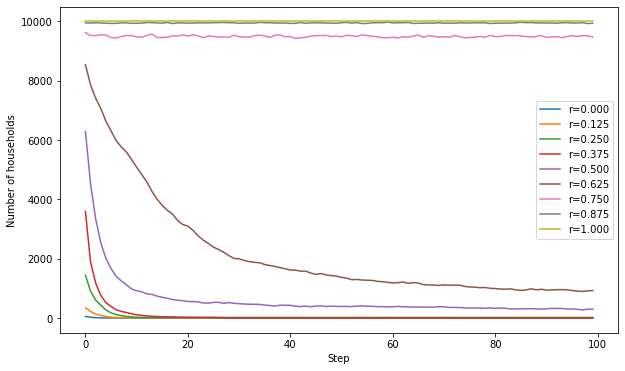

In [3]:
steps = 100
R = (0, 1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8, 8/8)
history_number_satisfied = np.zeros((len(R), steps))

for i, r in enumerate(R):
    board = Board(100, r)
    images = []
    for j in range(steps):
        print(f"\r{i+1} [{j+1}/{steps}]", end="")
        
        cur_board, num_satisfied = board.step()
        history_number_satisfied[i][j] = num_satisfied
        
        buf = io.BytesIO()
        plt.figure(figsize=(10, 10))
        plt.imshow(cur_board, cmap='Greys')
        plt.title(f"R={r} | Step:{j}/{steps}", fontsize=20)
        plt.savefig(buf, format="png")
        plt.close()
        buf.seek(0)
        images.append(Image.open(buf))
    imageio.mimsave("images/task_03/schelling_r_{:.3f}.gif".format(r), images)

plt.figure(figsize=(10, 6))
for i, r in enumerate(R):
    plt.plot(history_number_satisfied[i], label="r={:.3f}".format(r))
plt.legend()
plt.ylabel("Number of households")
plt.xlabel("Step")

![Gif](images/task_03/schelling_r_0.000.gif)

![Gif](images/task_03/schelling_r_0.125.gif)

![Gif](images/task_03/schelling_r_0.250.gif)

![Gif](images/task_03/schelling_r_0.375.gif)

![Gif](images/task_03/schelling_r_0.500.gif)

![Gif](images/task_03/schelling_r_0.625.gif)

![Gif](images/task_03/schelling_r_0.750.gif)

![Gif](images/task_03/schelling_r_0.875.gif)

![Gif](images/task_03/schelling_r_1.000.gif)